<a href="https://colab.research.google.com/github/fvillar99/Financial-Data-Analysis-Report/blob/main/Financia_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importams liberias:

import pandas as pd # pandas es una libreria para analisis de datos
import seaborn as sns # seaborn es una librería para hacer graficos estadisticos
import numpy as np # numpy es una libreria para analisis estadisticos y matematicos
import matplotlib.pyplot as plt # es una libreria de visualizacion
import io # io es una libreria complementaria de python para poder ayudar a la carga de archivos locales
from google.colab import files # es una libreria propia de Colab para la carga de archivos locales
from datetime import datetime, timedelta
import matplotlib.ticker as ticker


***INFORME DE ANÁLISIS DE DATOS FINANCIEROS DE EMPRESA***

In [2]:
#Importamos archivos y convertimos a pandas

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Financials.csv")


In [3]:
#Vemos la data del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [4]:
#Describe toda la data:

df.describe(include='all')

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
count,700,700,700,700,700,700,700,700,700,700,700,700,700,700.000000,700,700.000000
unique,5,5,6,4,510,6,7,550,515,559,545,557,16,NaN,12,NaN
top,Government,Canada,Paseo,High,$727.00,$10.00,$20.00,"$37,050.00",$-,"$4,981.00","$17,430.00",$-,01/06/2014,NaN,October,NaN
freq,300,140,202,245,5,202,100,3,53,2,4,5,70,NaN,140,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,2013.750000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.377321,NaN,0.433322
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2013.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.750000,NaN,2013.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,2014.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.250000,NaN,2014.000000


1. Limpiamos los datos.

In [5]:
#Limpiamos el nombre de las columnas para que sean manejables:

df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()

In [6]:
def valores_unicos (df):

  #valores numericos
  numericas = df.select_dtypes(include=['int64','float64'])
  valores_unicos = {col: df[col].unique().tolist() for col in numericas}

  #Imprimimos resultado de valores unicos numericos
  for col, values in valores_unicos.items():
    print(f"{col}: {values}")

  print("="*60)
  #valores unicos
  categoricas = df.select_dtypes(include=['object','category'])
  unicos_categoricas = {col: df[col].unique().tolist() for col in categoricas}

  #Imprimimos resultados de valores unicos categoricos:
  for col,values in unicos_categoricas.items():
    print(f"{col}:{values}")

Nos sirve para darnos una idea de cuales son los valores unicos de la data .

In [7]:
#Usamos la funcion valores_unicos:

valores_unicos(df)

month_number: [1, 6, 12, 3, 7, 8, 9, 10, 2, 11, 4, 5]
year: [2014, 2013]
segment:['Government', 'Midmarket', 'Channel Partners', 'Enterprise', 'Small Business']
country:['Canada', 'Germany', 'France', 'Mexico', 'United States of America']
product:[' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ', ' Amarilla ']
discount_band:[' None ', ' Low ', ' Medium ', ' High ']
units_sold:[' $1,618.50 ', ' $1,321.00 ', ' $2,178.00 ', ' $888.00 ', ' $2,470.00 ', ' $1,513.00 ', ' $921.00 ', ' $2,518.00 ', ' $1,899.00 ', ' $1,545.00 ', ' $2,665.50 ', ' $958.00 ', ' $2,146.00 ', ' $345.00 ', ' $615.00 ', ' $292.00 ', ' $974.00 ', ' $1,006.00 ', ' $367.00 ', ' $883.00 ', ' $549.00 ', ' $788.00 ', ' $2,472.00 ', ' $1,143.00 ', ' $1,725.00 ', ' $912.00 ', ' $2,152.00 ', ' $1,817.00 ', ' $1,493.00 ', ' $1,804.00 ', ' $2,161.00 ', ' $2,821.00 ', ' $2,001.00 ', ' $2,838.00 ', ' $1,527.00 ', ' $2,151.00 ', ' $2,750.00 ', ' $1,953.00 ', ' $4,219.50 ', ' $1,686.00 ', ' $2,141.00 ', ' $3,945.00 ', ' $2,2

In [8]:
#Eliminamos los caracteres  "$" y "-" en todas las columnas que contienen datos numericos

num_columns = ["units_sold","manufacturing_price","sale_price","gross_sales","discounts","sales","cogs","profit"]

for col in num_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[\$,()]", "", regex=True)
        .str.replace("-", "0", regex=True)
        .str.replace(r"\-", "0", regex=True)
        .str.strip()
        .astype(float)

    )



In [9]:
df["discounts"] = df["discounts"].replace(r"\$-","0",regex=True) #Eliminamos los simbolos de $ y - en el campo discount

In [10]:
df["discount_band"].isnull().sum() #Numero de nulos en la variable  discount_band

np.int64(0)

In [11]:
#Valores unicos de la variable discount_band
df["discount_band"].unique()


array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

In [12]:
#Limpiamos los valores de discount_band:

df["discount_band"] = (
    df["discount_band"]
    .str.strip() #Quitamos todos los espacios
    .str.lower() #Convertimos todos a minusculas
)



In [13]:
df["discount_band"].unique()

array(['none', 'low', 'medium', 'high'], dtype=object)

In [14]:
#Codificamos la variable discount_band:

discount_map = {
    "none" : 0,
    "low" : 1,
    "medium" : 2,
    "high" : 3
}


#Mapeamos el codigo:
mapeo = df["discount_band"].map(discount_map)

#Control de valores no mapeados
sin_nulos = mapeo.fillna(-1)

#Convertir a enteros:
final = sin_nulos.astype(int)

#Asignamos al DataFrame:
df['discount_band'] = final


In [15]:
#Se ve que la varibale date no es tipo fecha, por lo que procedemos a convertirlo.

df["date"] = pd.to_datetime(df["date"])

In [16]:
#Corroboramos la data que haya sido correctamente limpiada
df.head(10)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,0,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,0,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,0,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,0,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,0,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014
5,Government,Germany,Carretera,0,1513.0,3.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0,2014-01-12,12,December,2014
6,Midmarket,Germany,Montana,0,921.0,5.0,15.0,13815.0,0.0,13815.0,9210.0,4605.0,2014-01-03,3,March,2014
7,Channel Partners,Canada,Montana,0,2518.0,5.0,12.0,30216.0,0.0,30216.0,7554.0,22662.0,2014-01-06,6,June,2014
8,Government,France,Montana,0,1899.0,5.0,20.0,37980.0,0.0,37980.0,18990.0,18990.0,2014-01-06,6,June,2014
9,Channel Partners,Germany,Montana,0,1545.0,5.0,12.0,18540.0,0.0,18540.0,4635.0,13905.0,2014-01-06,6,June,2014


In [17]:
df.info() #Corroboramos que cada campo tenga su respectivo tipo de dato.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    int64         
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

2. Realizamos el Analisis exploratorio de la data

2.1 Analisis de las ventas diarias vs la fecha
  Usamos una grafica de linea para que nos de una nocion de la tendencia de las ventas a lo largo del periodo 2013 - 2014

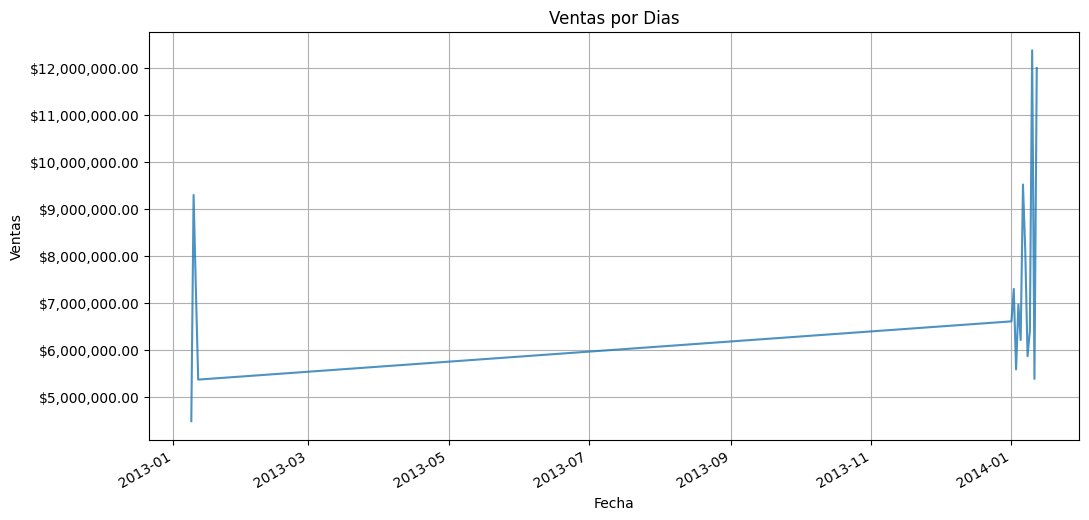

In [18]:
#Grafica Diaria de ventas vs la fecha

#Primero agrupamos la columna fecha(días) y ventas (suma de las ventas por dia)

ventas_diarias = df.groupby('date')['sales'].sum()

#Creamos el grafico:
plt.figure(figsize=(12, 6))
ventas_diarias.plot(kind='line',alpha=0.8)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Ventas por Dias")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()



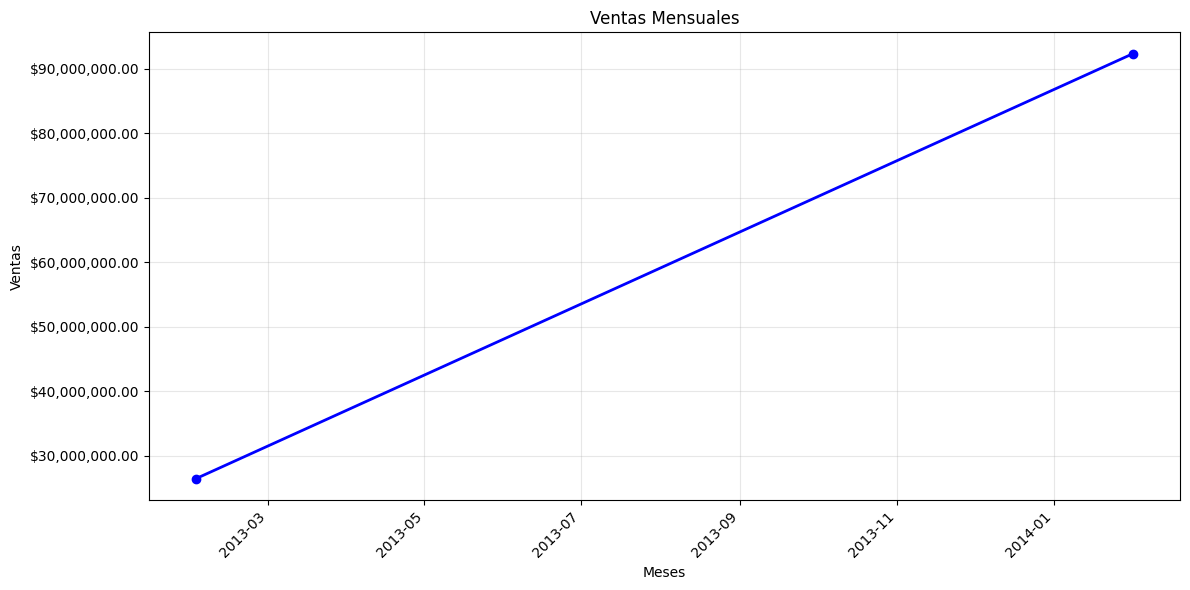

In [19]:
#Grafica de ventas mensuales:

ventas_mensuales = df.groupby(df['date'].dt.to_period('M'))['sales'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp(how="end")  #

# Crear el gráfico
plt.figure(figsize=(12,6))
ventas_mensuales.plot(kind='line', marker="o", linewidth=2, color='blue')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Ventas Mensuales")
plt.xlabel("Meses")
plt.ylabel("Ventas")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C1: A lo largo del periodo de Enero del 2013 a Diciembre del 2014, las ventas totales de la empresa han tenido una tendencia marcada alcista.
Lo que indica un buen desempeño en el área de ventas.

2.2 Analizamos los Profit
  Del mismo modo que con las ventas realizamos una grafica diaria y mensual en el perioro Ene-2013 al Dic-2014.

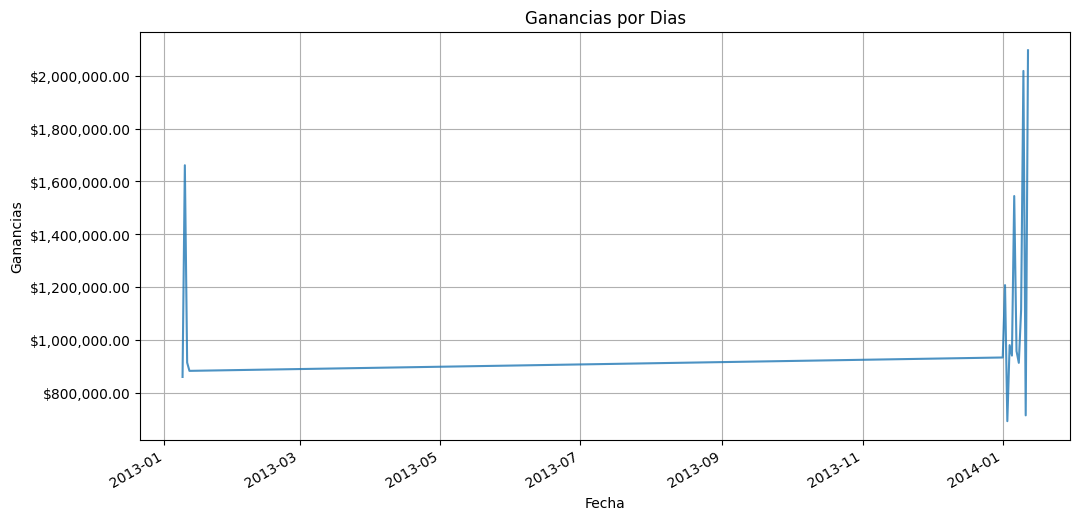

In [20]:
#Ganancias por dias :

#Primero agrupamos la columna fecha(días) y ventas (suma de las ventas por dia)

ventas_diarias = df.groupby('date')['profit'].sum()

#Creamos el grafico:
plt.figure(figsize=(12, 6))
ventas_diarias.plot(kind='line',alpha=0.8)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Ganancias por Dias")
plt.xlabel("Fecha")
plt.ylabel("Ganancias")
plt.grid(True)
plt.show()


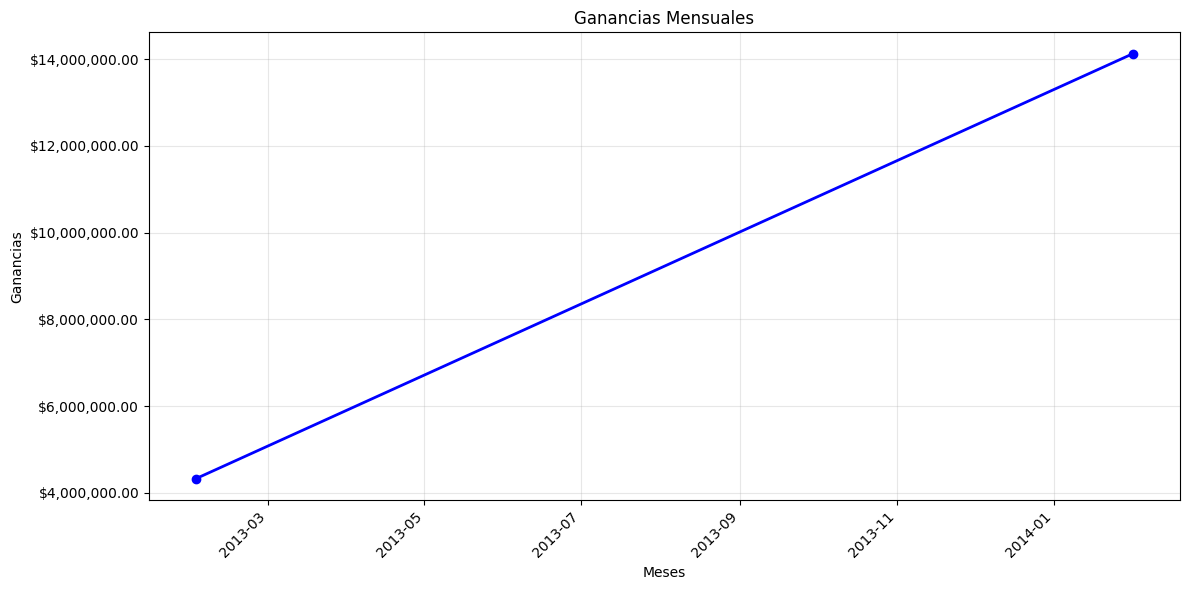

In [21]:
#Grafica de ganancias mensuales:

ventas_mensuales = df.groupby(df['date'].dt.to_period('M'))['profit'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp(how="end")  #

# Crear el gráfico
plt.figure(figsize=(12,6))
ventas_mensuales.plot(kind='line', marker="o", linewidth=2, color='blue')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Ganancias Mensuales")
plt.xlabel("Meses")
plt.ylabel("Ganancias")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C2: Las ganancias muestran el mismo comportamiento que las ventas, es decir la empresa muestra un crecimiento a largo plazo.

2.3 Analisis de las Ventas y Ganancias.

2.3.1 Analisis de Ventas vs Producto:
  El producto más vendido de la empresa es Paseo, este dato es crucial para conocer de donde proviene el mayor flujo de dinero y que otros productos podriamos potenciar sus ventas para no solamente depender de un unico producto.

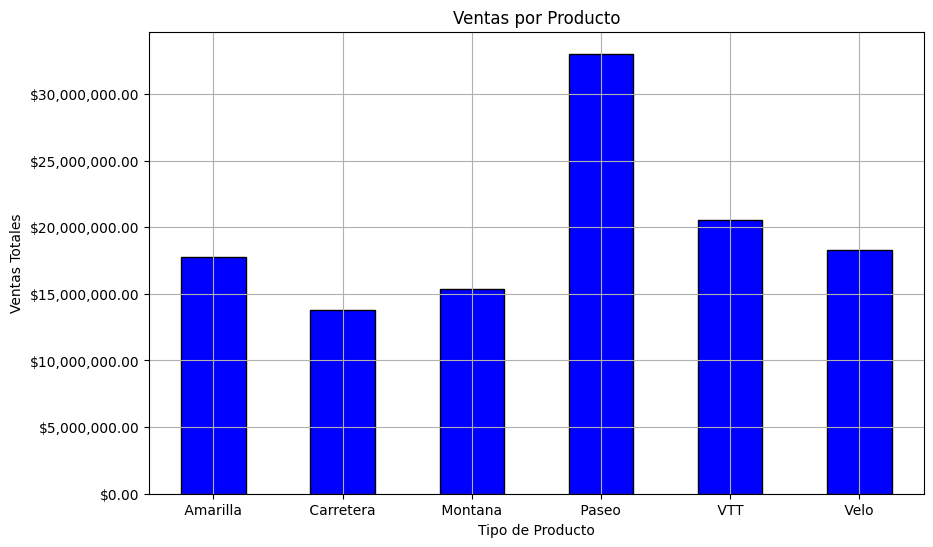

In [22]:
#Analizamos las ventas segun el tipo de productos(Hallamos el mas vendido).

ventas_por_producto = df.groupby(["product"])["sales"].sum()


plt.figure(figsize = (10,6))
ventas_por_producto.plot(kind='bar',color='blue',edgecolor='black')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title('Ventas por Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Así como se vio en el grafico anterior de ventas, el producto "Paseo" es el que mas ventas le deja a la empresa y tambien el que más ganancias le deja.

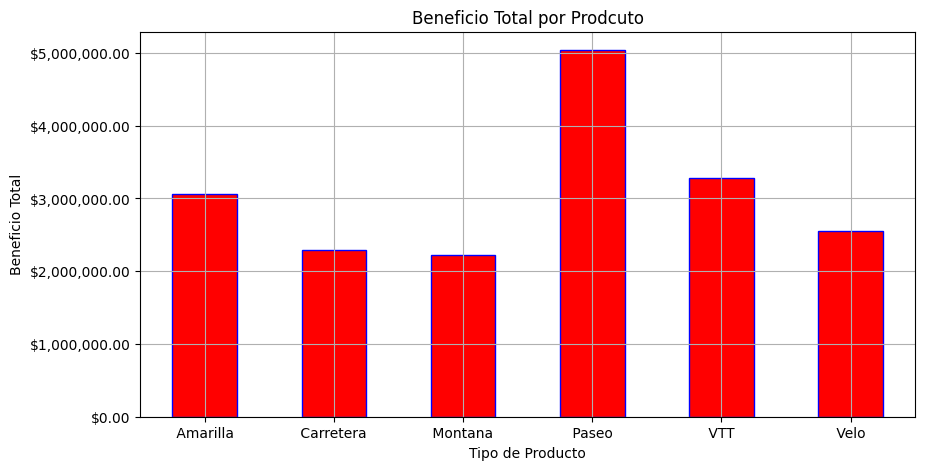

In [23]:
#Analizamos el beneficio total por producto.

profit_por_producto = df.groupby(["product"])["profit"].sum()

plt.figure(figsize = (10,5))
profit_por_producto .plot(kind='bar',color='red',edgecolor='blue')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Beneficio Total por Prodcuto")
plt.xlabel("Tipo de Producto")
plt.ylabel("Beneficio Total")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



2.4 Analizando los beneficios:


2.4.1 Beneficios totales por País.


      Nos indica que nuestro mayores clientes son Francia, Alemania y Canada, respectivamente. De estos 3 paises proviene nuestro mayor flujo de beneficio.

      Tema de analisis seria conocer porque no hemos penetrado tanto en el mercado Mexicano y Estadounidense.

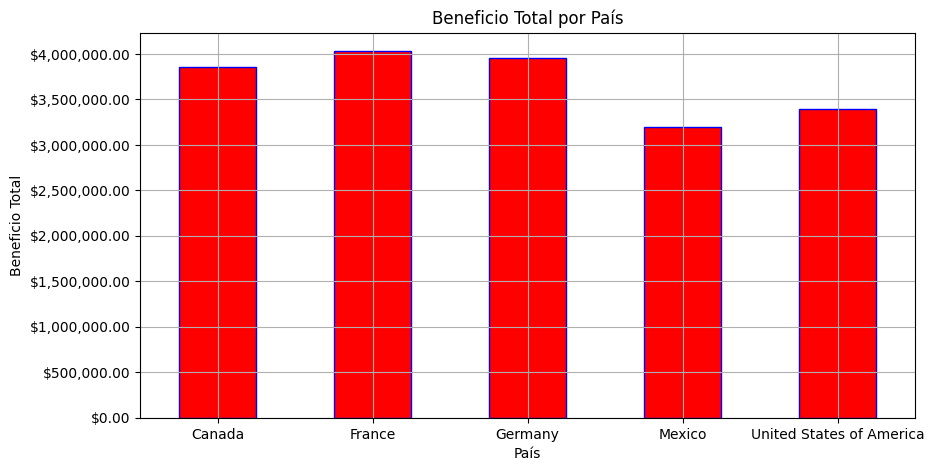

In [24]:
#Analizamos la ganancia por país (Determinamos en que pais se vende más)

profit_por_producto = df.groupby(["country"])["profit"].sum()

plt.figure(figsize = (10,5))
profit_por_producto .plot(kind='bar',color='red',edgecolor='blue')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Beneficio Total por País")
plt.xlabel("País")
plt.ylabel("Beneficio Total")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

2.4.2. Beneficios totales vs segmento

      El segmento del cual provienen nuestro mayor beneficio es el gubernamental. Se podria recomendar el promover otros segmentos para tratar de diversificar, como por ejemplo potenciar las ventas en el segmento de negocios pequeños y Canales de asociados.

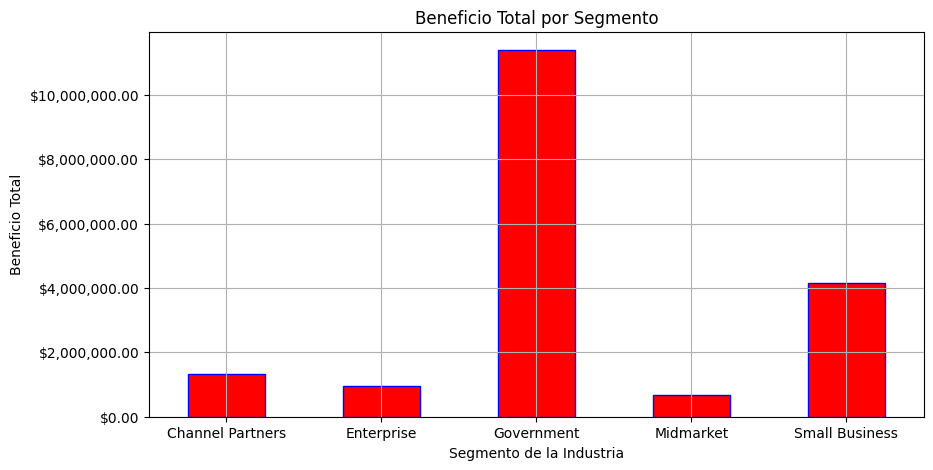

In [25]:
##Analizamos la ganancia por país (Determinamos en que segmento se gana más)

profit_por_producto = df.groupby(["segment"])["profit"].sum()

plt.figure(figsize = (10,5))
profit_por_producto .plot(kind='bar',color='red',edgecolor='blue')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.title("Beneficio Total por Segmento")
plt.xlabel("Segmento de la Industria")
plt.ylabel("Beneficio Total")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

2.5. Analisis del Profit Margin segun Segmento

      Para analizar el profit margin, primero lo hemos determinado como el cociente entre los beneficions (profit) y ventas (sales).

      El profit margin se debe entender como el porcentaje de mis ventas que se convierten en ganancias.

      En el grafico nos muestra cual es el rango en el que se mueve el profit margin segun Segmento.

      Por ejemplo, para el segmento gobierno nos indica que su margen minimo es de aproximadamente 15% y maximo del 50% con una media  del 30%.

      Además, el segmento denominado Channel Partners es el que mayor profit margen tiene,por encima de un 70%. Lo que nos indica que sus beneficios son los mas alto en comparacion al resto de Segmentos

/tmp/ipython-input-2979078669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='profit_margin',


<Axes: xlabel='segment', ylabel='profit_margin'>

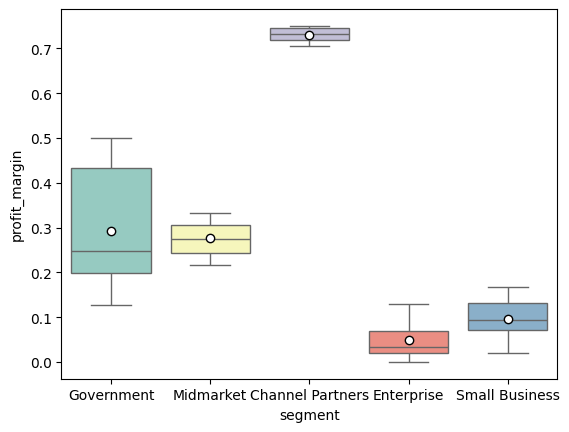

In [26]:
#Determinamos el Profit Margin

#1. Creamos una columna:

df["profit_margin"] = df["profit"] / df["sales"]

sns.boxplot(data=df, x='segment', y='profit_margin',
            palette='Set3',  # Paleta de colores
            showmeans=True,  # Mostrar media
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

Finalmente mostramos la matriz de correlación.

La variable profit muestra un alto grado de correlación con las variables:

sales,cogs,discount, y sales price. Estas podria servir para futuros analisis o para realizar modelos de ML para maximizar las ventas en segmentos o paises.

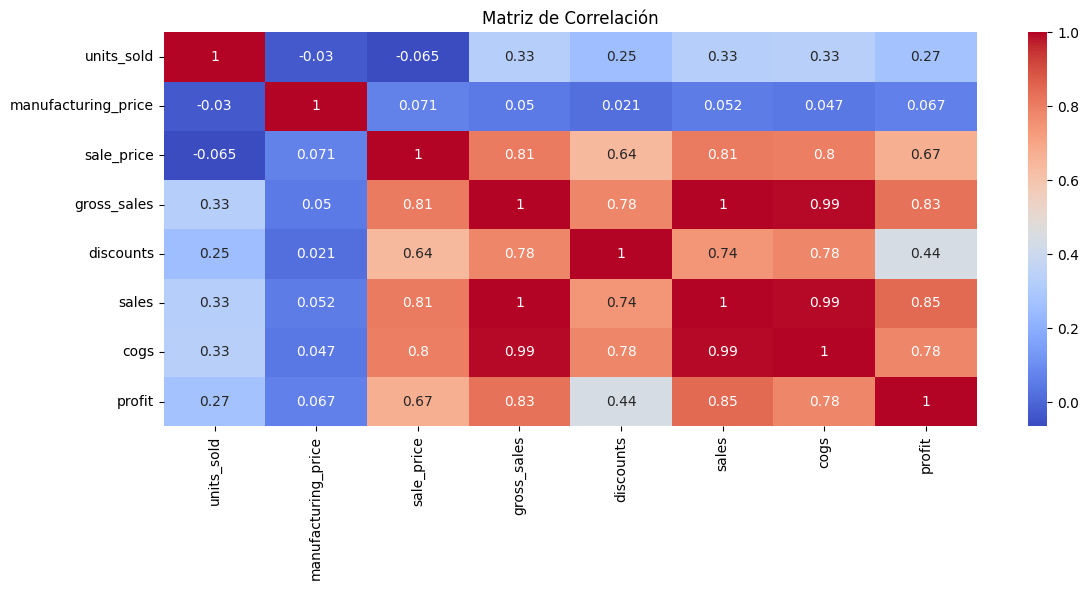

In [27]:
#Creacion de la matriz de correlación:

corr_matrx = df[num_columns].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrx, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()